# Sentimen Analisis Review APK Play Store
Selamat datang dalam proyek Sentimen Analisis Review APK Play Store!  
Dalam proyek ini, kita akan mengeksplorasi ulasan pengguna di Google Play Store untuk memahami sentimen mereka.

## Studi Kasus
**Kasus:**  
Seorang pengembang aplikasi ingin mengetahui bagaimana pengguna menilai aplikasi mobile-nya di Google Play Store.  
Data ulasan dikumpulkan dan didokumentasikan menggunakan **aplikasi Lemon8**.

**Tujuan Analisis:**  
- Mengelompokkan ulasan menjadi positif, negatif, dan netral  
- Memahami masalah dan kelebihan aplikasi berdasarkan feedback pengguna  
- Memberikan rekomendasi perbaikan atau fitur baru  

## Langkah Proyek
1. Kumpulkan data ulasan dari Google Play Store (Lemon8 digunakan sebagai referensi visual)  
2. Bersihkan teks: hapus simbol, angka, stopwords, gabungkan token jadi kalimat  
3. Stemming: ubah kata berimbuhan menjadi kata dasar  
4. Analisis Sentimen: gunakan model machine learning dan deep learning (SVM/LSTM)  
5. Evaluasi & Visualisasi: distribusi ulasan, kata yang sering muncul, insight penting  

## Manfaat
- Mengetahui persepsi pengguna secara cepat  
- Membantu prioritas perbaikan fitur atau bug  
- Memperkuat strategi marketing dan engagement  
- Lemon8 memudahkan dokumentasi data dengan tampilan visual menarik


# **Import Library**

In [103]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [104]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab') # Mengunduh dataset yang diperlukan untuk sentence tokenization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [105]:
# Import library utama
import re
import string
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk NLP (Natural Language Processing)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from tqdm import tqdm

# Library untuk Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB

# Library untuk Deep Learning (Neural Network)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Import Library
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Loading Dataset

In [106]:
# Membaca dataset hasil scraping
df = pd.read_csv('lemon8_reviews_raw.csv')

In [107]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = df.shape
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 15000
Jumlah kolom: 11


In [108]:
# Lihat 5 baris pertama
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e8951923-5e6a-40bb-9afa-cd67e740cd3d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,5,11,9.7.0,2025-10-16 09:33:29,NaN,NaN,9.7.0
1,230d2647-1df3-498e-8744-40ca5ec14a1c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",5,228,9.7.0,2025-10-04 03:24:36,NaN,NaN,9.7.0
2,ff1391f7-bcf7-4da5-9c39-62e6524a0533,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",5,250,9.7.0,2025-10-04 12:14:21,NaN,NaN,9.7.0
3,360ca24f-cde4-4d3d-b1f0-d14bceb1e924,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",2,112,9.5.0,2025-09-06 23:56:57,NaN,NaN,9.5.0
4,73cf8812-d07e-4924-853f-80be24005ce5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih merasa berkembang nya akun di lemon8 ini mengalir secara alami gitu.Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya.Dan semakin berinovasi tentunya.",5,938,9.2.0,2025-07-30 08:41:36,NaN,NaN,9.2.0


In [109]:
df = pd.DataFrame(df[['at', 'userName', 'score', 'content']])
df.head()

,at,userName,score,content
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan."
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️"
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended"
4,2025-07-30 08:41:36,Pengguna Google,5,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih merasa berkembang nya akun di lemon8 ini mengalir secara alami gitu.Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya.Dan semakin berinovasi tentunya."


In [110]:
# Menampilkan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   at        15000 non-null  object
 1   userName  15000 non-null  object
 2   score     15000 non-null  int64 
 3   content   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


In [111]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = df.dropna()

In [112]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   at        15000 non-null  object
 1   userName  15000 non-null  object
 2   score     15000 non-null  int64 
 3   content   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


In [113]:
# Menghapus baris duplikat
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# Menampilkan jumlah baris dan kolom
print(f"Jumlah ulasan setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah kolom setelah menghapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}")

display(clean_df.head())

Jumlah ulasan setelah menghapus duplikat: 15000
Jumlah kolom setelah menghapus duplikat: 4


,at,userName,score,content
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan."
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️"
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended"
4,2025-07-30 08:41:36,Pengguna Google,5,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih merasa berkembang nya akun di lemon8 ini mengalir secara alami gitu.Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya.Dan semakin berinovasi tentunya."


#Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [114]:
# Fungsi untuk membersihkan teks dari simbol, link, angka, dll
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # hapus mention @username
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # hapus hashtag #tag
    text = re.sub(r'RT[\s]', '', text)         # hapus RT
    text = re.sub(r"http\S+", '', text)        # hapus link URL
    text = re.sub(r'[0-9]+', '', text)         # hapus angka
    text = re.sub(r'\s+', ' ', text)           # gabungkan spasi berlebih
    text = re.sub(r'[^\w\s]', ' ', text)       # ganti semua simbol dengan spasi
    text = text.replace('\n', ' ')             # ganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip()                         # hapus spasi di awal & akhir
    return text

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df.head()

,at,userName,score,content,text_clean
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",Sebenarnya aplikasinya bagus mirip dengan Instagram Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan namum tidak sesuai karakter video yang kita Upload padahal lagu yang kita gunakan pun itu dari Tiktok No recommended
4,2025-07-30 08:41:36,Pengguna Google,5,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih merasa berkembang nya akun di lemon8 ini mengalir secara alami gitu.Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya.Dan semakin berinovasi tentunya.",Baru masuk lemon Selama ini masih oke lemon banyak menginspirasi bagi penggunanya Dan saya menyukainya karena beda saja dari yang lain Lemon lebih ke personal nya yang nggak harus di suruh ini itu Kalau campaign oke lah Tapi aku pengguna lebih merasa berkembang nya akun di lemon ini mengalir secara alami gitu Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya Dan semakin berinovasi tentunya


In [115]:
# Fungsi mengubah semua huruf menjadi huruf kecil
def casefoldingText(text):
    return text.lower()

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df.head()

,at,userName,score,content,text_clean,text_casefoldingText
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",Sebenarnya aplikasinya bagus mirip dengan Instagram Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan namum tidak sesuai karakter video yang kita Upload padahal lagu yang kita gunakan pun itu dari Tiktok No recommended,sebenarnya aplikasinya bagus mirip dengan instagram jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan lagu yang sudah di siapkan namum tidak sesuai karakter video yang kita upload padahal lagu yang kita gunakan pun itu dari tiktok no recommended
4,2025-07-30 08:41:36,Pengguna Google,5,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih merasa berkembang nya akun di lemon8 ini mengalir secara alami gitu.Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya.Dan semakin berinovasi tentunya.",Baru masuk lemon Selama ini masih oke lemon banyak menginspirasi bagi penggunanya Dan saya menyukainya karena beda saja dari yang lain Lemon lebih ke personal nya yang nggak harus di suruh ini itu Kalau campaign oke lah Tapi aku pengguna lebih merasa berkembang nya akun di lemon ini mengalir secara alami gitu Semoga ke depan nya semakin bagus dan semakin bermanfaat bagi semua penggunanya Dan semakin berinovasi tentunya,baru masuk lemon selama ini masih oke lemon banyak menginspirasi bagi penggunanya dan saya menyukainya karena beda saja dari yang lain lemon lebih ke personal nya yang nggak harus di suruh ini itu kalau campaign oke lah tapi aku pengguna lebih merasa berkembang nya akun di

In [116]:
# URL raw file Excel di GitHub
url = 'https://github.com/nyomanarinit/KamusKataBaku/raw/main/kamuskatabaku.xlsx'

# Load file Excel langsung dari URL
slang_df = pd.read_excel(url)

# Ubah jadi dictionary: key = kata slang, value = kata baku
slangwords = dict(zip(slang_df['tidak_baku'], slang_df['kata_baku']))

# Fungsi mengganti kata slang/singkatan menjadi bentuk standar
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        fixed_words.append(slangwords.get(word.lower(), word))
    return ' '.join(fixed_words)

# Terapkan ke dataframe
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df.head()


,at,userName,score,content,text_clean,text_casefoldingText,text_slangwords
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi ya fiturnya agak kasih banyak sedikit
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll sok memudahkan hidup anda bagi yang membutuhkan
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yang saya butuhkan ada di sini mantap pertahankan terus ya saya sangat terinspirasi sekali dengan adanya aplikasi ini
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",Sebenarnya aplikasinya bagus mirip dengan Instagram Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan namum tidak sesuai karakter video yang kita Upload padahal lagu yang kita gunakan pun itu dari Tiktok No recommended,sebenarnya aplikasinya bagus mirip dengan instagram jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan lagu yang sudah di siapkan namum tidak sesuai karakter video yang kita upload padahal lagu yang kita gunakan pun itu dari tiktok no recommended,sebenarnya aplikasinya bagus mirip dengan instagram jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan lagu yang sudah di siapkan namum tidak sesuai karakter video yang kita upload padahal lagu yang kita gunakan pun itu dari tiktok no recommended
4,2025-07-30 08:41:36,Pengguna Google,5,"Baru masuk lemon8. Selama ini masih oke,lemon8 banyak menginspirasi bagi penggunanya. Dan saya menyukainya karena beda saja dari yang lain. Lemon8 lebih ke personal nya yang nggak harus di suruh ini itu.Kalau campaign oke lah.Tapi aku pengguna lebih mer

In [117]:
# Fungsi tokenizing: memecah teks menjadi kata-kata
def tokenizingText(text):
    return word_tokenize(text)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df.head()

,at,userName,score,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi ya fiturnya agak kasih banyak sedikit,"[suka, sekali, aplikasi, banyak, sekali, tutorial, atau, mengenai, kegiatan, hari, hari, terimakasih, lemon, jangan, di, upgrade, aplikasi, ya, fiturnya, agak, kasih, banyak, sedikit]"
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll sok memudahkan hidup anda bagi yang membutuhkan,"[baru, tau, aplikasi, lemon, ternyata, lebih, sesimpel, itu, memudahkan, untuk, bisa, sharing, dan, menemukan, berbagai, resep, masakan, dll, sok, memudahkan, hidup, anda, bagi, yang, membutuhkan]"
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yang saya butuhkan ada di sini mantap pertahankan terus ya saya sangat terinspirasi sekali dengan adanya aplikasi ini,"[aplikasi, ini, sangat, membantu, sekali, dari, perihal, fashion, resep, masakan, kecantikan, ootd, dll, apapun, yang, saya, butuhkan, ada, di, sini, mantap, pertahankan, terus, ya, saya, sangat, terinspirasi, sekali, dengan, adanya, aplikasi, ini]"
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",Sebenarnya aplikasinya bagus mirip dengan Instagram Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan namum tidak sesuai karakter video yang kita Upload padahal lagu yang kita gunakan pun itu dari Tiktok No recommended,sebenarnya aplikasinya bagus mirip dengan instagram jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan lagu yang sudah di siapkan namum tidak sesuai karakter video yang kita upload padahal lagu yan

In [118]:
def filteringText(text):
    # Ambil stopword bahasa Indonesia
    listStopwords = set(stopwords.words('indonesian'))

    # Tambahkan stopword custom (kata-kata netral atau umum)
    listStopwords.update([
        'iya','yaa','gak','nya','na','sih','ku',
        "di","ga","ya","gaa","loh","kah","woi","woii","woy",
        'ini','itu','saja','dan','yang','ke','dari','dengan', 'bah'
    ])

    # Filter token: hanya simpan kata yang tidak ada di stopword
    filtered = [txt for txt in text if txt not in listStopwords]

    return filtered

# Terapkan ke dataframe
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df.head()


,at,userName,score,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi ya fiturnya agak kasih banyak sedikit,"[suka, sekali, aplikasi, banyak, sekali, tutorial, atau, mengenai, kegiatan, hari, hari, terimakasih, lemon, jangan, di, upgrade, aplikasi, ya, fiturnya, agak, kasih, banyak, sedikit]","[suka, aplikasi, tutorial, kegiatan, terimakasih, lemon, upgrade, aplikasi, fiturnya, kasih]"
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll sok memudahkan hidup anda bagi yang membutuhkan,"[baru, tau, aplikasi, lemon, ternyata, lebih, sesimpel, itu, memudahkan, untuk, bisa, sharing, dan, menemukan, berbagai, resep, masakan, dll, sok, memudahkan, hidup, anda, bagi, yang, membutuhkan]","[tau, aplikasi, lemon, sesimpel, memudahkan, sharing, menemukan, resep, masakan, dll, sok, memudahkan, hidup, membutuhkan]"
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yang saya butuhkan ada di sini mantap pertahankan terus ya saya sangat terinspirasi sekali dengan adanya aplikasi ini,"[aplikasi, ini, sangat, membantu, sekali, dari, perihal, fashion, resep, masakan, kecantikan, ootd, dll, apapun, yang, saya, butuhkan, ada, di, sini, mantap, pertahankan, terus, ya, saya, sangat, terinspirasi, sekali, dengan, adanya, aplikasi, ini]","[aplikasi, membantu, perihal, fashion, resep, masakan, kecantikan, ootd, dll, apapun, butuhkan, mantap, pertahankan, terinspirasi, aplikasi]"
3,2025-09-06 23:56:57,Pengguna Google,2,"Sebenarnya aplikasinya bagus mirip dengan Instagram. Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan, namum tidak sesuai karakter video yang kita Upload. padahal lagu yang kita gunakan pun itu dari Tiktok. No recommended",Sebenarnya aplikasinya bagus mirip dengan Instagram Jeleknya setiap video yang kita upload selalu di bisukan dengan alasan tidak sah dan memaksa kita untuk menggunakan Lagu yang sudah di Siapkan na

In [119]:
# Buat stemmer sekali saja
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi 1: gabungkan list token jadi kalimat
def toSentence(list_words):
    if isinstance(list_words, list):
        return ' '.join(list_words)
    return list_words

# Fungsi 2: stemming
def stemmingText(text):
    return stemmer.stem(text)

# Aktifkan progress bar
tqdm.pandas()

# Langkah 1: ubah list token jadi kalimat
clean_df['text_sentence'] = clean_df['text_stopword'].progress_apply(toSentence)

# Langkah 2: lakukan stemming dan simpan di 'text_final'
clean_df['text_final'] = clean_df['text_sentence'].progress_apply(stemmingText)

# Hasil akhir
clean_df.head()


100%|██████████| 15000/15000 [10:54<00:00, 22.92it/s]


,at,userName,score,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_sentence,text_final
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi ya fiturnya agak kasih banyak sedikit,"[suka, sekali, aplikasi, banyak, sekali, tutorial, atau, mengenai, kegiatan, hari, hari, terimakasih, lemon, jangan, di, upgrade, aplikasi, ya, fiturnya, agak, kasih, banyak, sedikit]","[suka, aplikasi, tutorial, kegiatan, terimakasih, lemon, upgrade, aplikasi, fiturnya, kasih]",suka aplikasi tutorial kegiatan terimakasih lemon upgrade aplikasi fiturnya kasih,suka aplikasi tutorial giat terimakasih lemon upgrade aplikasi fiturnya kasih
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll sok memudahkan hidup anda bagi yang membutuhkan,"[baru, tau, aplikasi, lemon, ternyata, lebih, sesimpel, itu, memudahkan, untuk, bisa, sharing, dan, menemukan, berbagai, resep, masakan, dll, sok, memudahkan, hidup, anda, bagi, yang, membutuhkan]","[tau, aplikasi, lemon, sesimpel, memudahkan, sharing, menemukan, resep, masakan, dll, sok, memudahkan, hidup, membutuhkan]",tau aplikasi lemon sesimpel memudahkan sharing menemukan resep masakan dll sok memudahkan hidup membutuhkan,tau aplikasi lemon simpel mudah sharing temu resep masakan dll sok mudah hidup butuh
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yang saya butuhkan ada di sini mantap pertahankan terus ya saya sangat terinspirasi sekali dengan adanya aplikasi ini,"[aplikasi, ini, sangat, membantu, sekali, dari, perihal, fashion, resep, masakan, kecantikan, ootd, dll, apapun, yang, saya, butuhkan, ada, di, sini, mantap, pertahankan, terus, ya, saya, sangat, terinspirasi, sekali, dengan, adanya, aplikasi, ini]","[aplikasi, membantu, perihal, fashion, resep, masakan, kecantikan, ootd, dll, apapun, butuhkan, mantap, pertahankan, terinspirasi, aplikasi]",aplikasi membantu perihal fashion resep masakan kecantikan ootd dll apapun butuhkan mantap pertahankan terinspirasi aplikasi,aplikasi bantu perihal fashion resep masakan cantik 

In [120]:
# Simpan DataFrame ke CSV
clean_df.to_csv('lemon8_reviews_clean.csv', index=False)

#Pelabelan

In [121]:
df = pd.read_csv('lemon8_reviews_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   at                    15000 non-null  object
 1   userName              15000 non-null  object
 2   score                 15000 non-null  int64 
 3   content               15000 non-null  object
 4   text_clean            14883 non-null  object
 5   text_casefoldingText  14883 non-null  object
 6   text_slangwords       14883 non-null  object
 7   text_tokenizingText   15000 non-null  object
 8   text_stopword         15000 non-null  object
 9   text_sentence         14760 non-null  object
 10  text_final            14733 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [122]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14733 entries, 0 to 14996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   at                    14733 non-null  object
 1   userName              14733 non-null  object
 2   score                 14733 non-null  int64 
 3   content               14733 non-null  object
 4   text_clean            14733 non-null  object
 5   text_casefoldingText  14733 non-null  object
 6   text_slangwords       14733 non-null  object
 7   text_tokenizingText   14733 non-null  object
 8   text_stopword         14733 non-null  object
 9   text_sentence         14733 non-null  object
 10  text_final            14733 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [123]:
df = pd.DataFrame(df)

Ekstraksi Fitur dan Pelabelan Data

Metode Pelabelan
Data pada proyek ini dilabeli menggunakan **pendekatan berbasis leksikon (lexicon-based rule)**.
Setiap teks (ulasan pengguna) dievaluasi menggunakan dua daftar kata:
- **Kamus positif** (`positive.tsv`)
- **Kamus negatif** (`negative.tsv`)

Skor sentimen dihitung dengan cara:
1. Jika jumlah kata positif lebih banyak → diberi label **positif**
2. Jika jumlah kata negatif lebih banyak → diberi label **negatif**
3. Jika seimbang atau tidak mengandung kata dari kedua leksikon → diberi label **netral**

Metode ini termasuk dalam kategori **rule-based labeling**, karena label diberikan berdasarkan aturan yang ditetapkan secara otomatis, bukan anotasi manual.

Untuk memastikan label benar, dilakukan validasi manual terhadap sebagian kecil data (sekitar 200 sampel) agar distribusi label tetap logis dan seimbang.


In [124]:
# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

# Membaca file positif dan negatif, lalu ubah ke set
positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
df[['Score_Sentiment', 'Sentiment']] = df['text_final'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
df.head(5)

,at,userName,score,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_sentence,text_final,Score_Sentiment,Sentiment
0,2025-10-16 09:33:29,Pengguna Google,5,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari-hari 😊😊 terimakasih lemon8 jangan di upgrade aplikasi yah...fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi yah fiturnya agak kasih banyak sedikit,suka sekali aplikasi banyak sekali tutorial atau mengenai kegiatan hari hari terimakasih lemon jangan di upgrade aplikasi ya fiturnya agak kasih banyak sedikit,"['suka', 'sekali', 'aplikasi', 'banyak', 'sekali', 'tutorial', 'atau', 'mengenai', 'kegiatan', 'hari', 'hari', 'terimakasih', 'lemon', 'jangan', 'di', 'upgrade', 'aplikasi', 'ya', 'fiturnya', 'agak', 'kasih', 'banyak', 'sedikit']","['suka', 'aplikasi', 'tutorial', 'kegiatan', 'terimakasih', 'lemon', 'upgrade', 'aplikasi', 'fiturnya', 'kasih']",suka aplikasi tutorial kegiatan terimakasih lemon upgrade aplikasi fiturnya kasih,suka aplikasi tutorial giat terimakasih lemon upgrade aplikasi fiturnya kasih,-1,Negatif
1,2025-10-04 03:24:36,Pengguna Google,5,"Baru tau aplikasi lemon8 ternyata lebih sesimpel itu, memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll. so memudahkan hidup Anda bagi yang membutuhkan.",Baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup Anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll so memudahkan hidup anda bagi yang membutuhkan,baru tau aplikasi lemon ternyata lebih sesimpel itu memudahkan untuk bisa sharing dan menemukan berbagai resep masakan dll sok memudahkan hidup anda bagi yang membutuhkan,"['baru', 'tau', 'aplikasi', 'lemon', 'ternyata', 'lebih', 'sesimpel', 'itu', 'memudahkan', 'untuk', 'bisa', 'sharing', 'dan', 'menemukan', 'berbagai', 'resep', 'masakan', 'dll', 'sok', 'memudahkan', 'hidup', 'anda', 'bagi', 'yang', 'membutuhkan']","['tau', 'aplikasi', 'lemon', 'sesimpel', 'memudahkan', 'sharing', 'menemukan', 'resep', 'masakan', 'dll', 'sok', 'memudahkan', 'hidup', 'membutuhkan']",tau aplikasi lemon sesimpel memudahkan sharing menemukan resep masakan dll sok memudahkan hidup membutuhkan,tau aplikasi lemon simpel mudah sharing temu resep masakan dll sok mudah hidup butuh,2,Positif
2,2025-10-04 12:14:21,Pengguna Google,5,"aplikasi ini sangat membantu sekali, dari perihal fashion, resep masakan, kecantikan,, ootd,, dll apapun yg saya butuhkan ada di sini,, mantap,, pertahankan terus yaa. saya sangat terinspirasi sekali dengan adanya aplikasi ini..❤️❤️",aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yg saya butuhkan ada di sini mantap pertahankan terus yaa saya sangat terinspirasi sekali dengan adanya aplikasi ini,aplikasi ini sangat membantu sekali dari perihal fashion resep masakan kecantikan ootd dll apapun yang saya butuhkan ada di sini mantap pertahankan terus ya saya sangat terinspirasi sekali dengan adanya aplikasi ini,"['aplikasi', 'ini', 'sangat', 'membantu', 'sekali', 'dari', 'perihal', 'fashion', 'resep', 'masakan', 'kecantikan', 'ootd', 'dll', 'apapun', 'yang', 'saya', 'butuhkan', 'ada', 'di', 'sini', 'mantap', 'pertahankan', 'terus', 'ya', 'saya', 'sangat', 'terinspirasi', 'sekali', 'dengan', 'adanya', 'aplikasi', 'ini']","['aplikasi', 'membantu', 'perihal', 'fashion', 'resep', 'masakan

In [125]:
# Hitung jumlah dan persentase
counts = df['Sentiment'].value_counts()
percentages = df['Sentiment'].value_counts(normalize=True) * 100

# Gabungkan menjadi DataFrame
sentiment_summary = pd.DataFrame({
    'Jumlah': counts,
    'Persentase (%)': percentages.round(2)
})

print(sentiment_summary)


           Jumlah  Persentase (%)
Sentiment                        
Positif      6288           42.68
Netral       5436           36.90
Negatif      3009           20.42


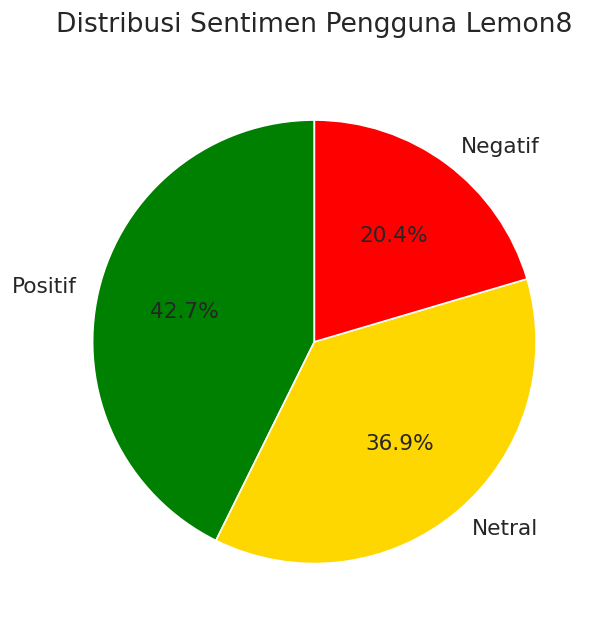

In [126]:
# Membuat objek gambar dan sumbu
fig, ax = plt.subplots(figsize=(6, 6))

# Menghitung jumlah data untuk tiap label sentimen
sizes = df['Sentiment'].value_counts().values
labels = df['Sentiment'].value_counts().index

# Warna untuk tiap kategori biar lebih informatif
colors = ['green', 'gold', 'red']

# Membuat pie chart
ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 13}
)

# Menambahkan judul
ax.set_title('Distribusi Sentimen Pengguna Lemon8', fontsize=16, pad=20)

# Menampilkan chart
plt.show()

In [127]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = df[df['Sentiment'] == 'Positif']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_final', 'Score_Sentiment', 'Sentiment']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'Score_Sentiment' secara menurun.
positive_tweets = positive_tweets.sort_values(by='Score_Sentiment', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [128]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = df[df['Sentiment'] == 'Negatif']

# Memilih hanya kolom-kolom tertentu.
negative_tweets = negative_tweets[['text_final', 'Score_Sentiment', 'Sentiment']]

# Mengurutkan berdasarkan skor sentimen terendah.
negative_tweets = negative_tweets.sort_values(by='Score_Sentiment', ascending=True)

# Mengatur ulang indeks dan menambahkannya agar dimulai dari 1.
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [129]:
# Mengatur agar teks panjang bisa tampil penuh
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral.
neutral_tweets = df[df['Sentiment'] == 'Netral']

# Memilih hanya kolom-kolom tertentu.
neutral_tweets = neutral_tweets[['text_final', 'Score_Sentiment', 'Sentiment']]

# Mengurutkan berdasarkan skor sentimen (bisa descending untuk melihat variasi nilai).
neutral_tweets = neutral_tweets.sort_values(by='Score_Sentiment', ascending=False)

# Mengatur ulang indeks dan menambahkannya agar dimulai dari 1.
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

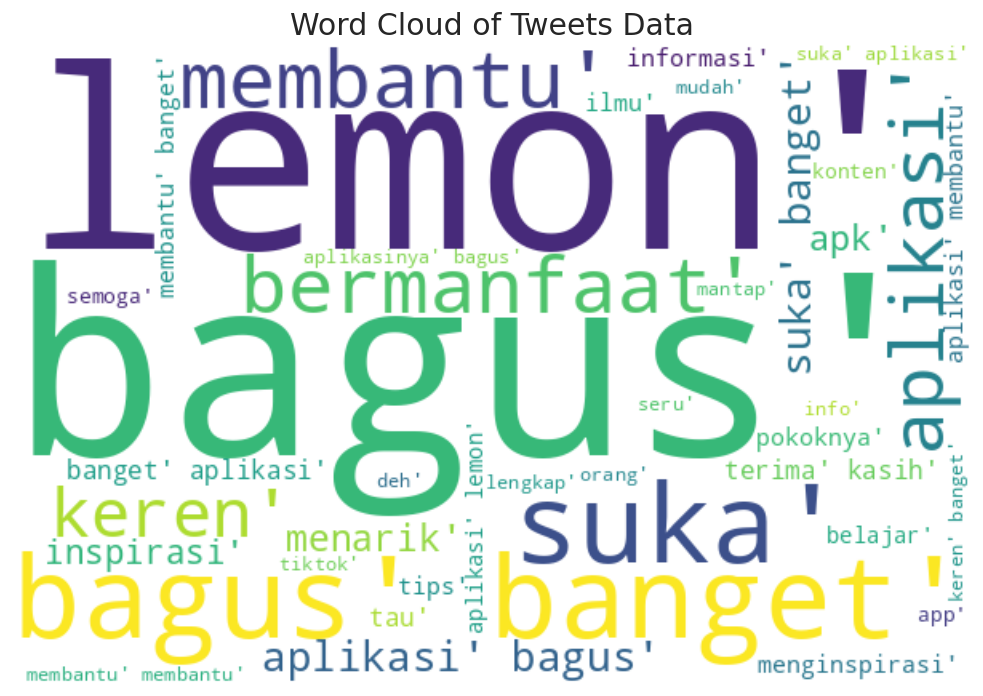

In [130]:
# Gabungkan semua kata dari kolom 'text_stopword' menjadi satu string
list_words = ' '.join([word for tweet in df['text_stopword'] for word in tweet.split()])

# Buat WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.tight_layout(pad=0)
plt.show()


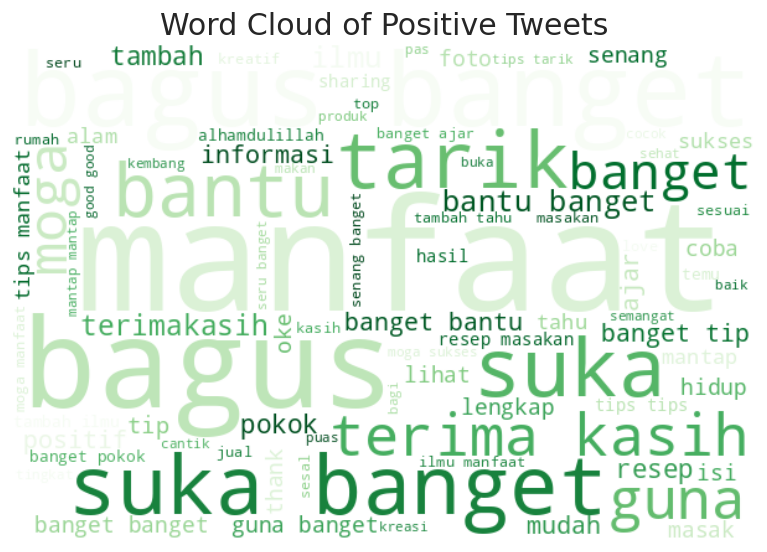

In [131]:
# Filter tweet positif
positive_tweets = df[df['Sentiment'] == 'Positif']['text_final']

# Gabungkan kata-kata dari lexicon positif
list_words_pos = ' '.join([word for tweet in positive_tweets for word in tweet.split() if word in positive_lexicon])

# Buat WordCloud
wordcloud_pos = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Greens',
    min_font_size=10
).generate(list_words_pos)

# Plot
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud of Positive Tweets', fontsize=18)
plt.axis('off')
plt.show()


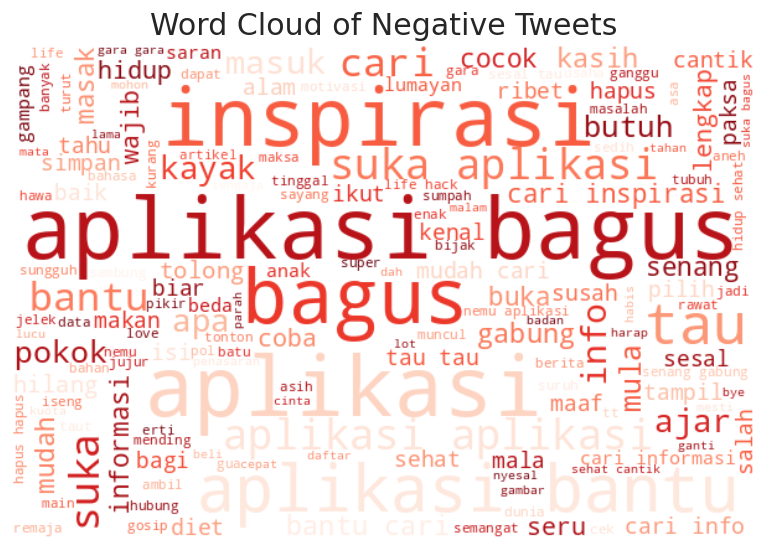

In [132]:
negative_tweets = df[df['Sentiment'] == 'Negatif']['text_final']
list_words_neg = ' '.join([word for tweet in negative_tweets for word in tweet.split() if word in negative_lexicon])

wordcloud_neg = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Reds',
    min_font_size=10
).generate(list_words_neg)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative Tweets', fontsize=18)
plt.axis('off')
plt.show()

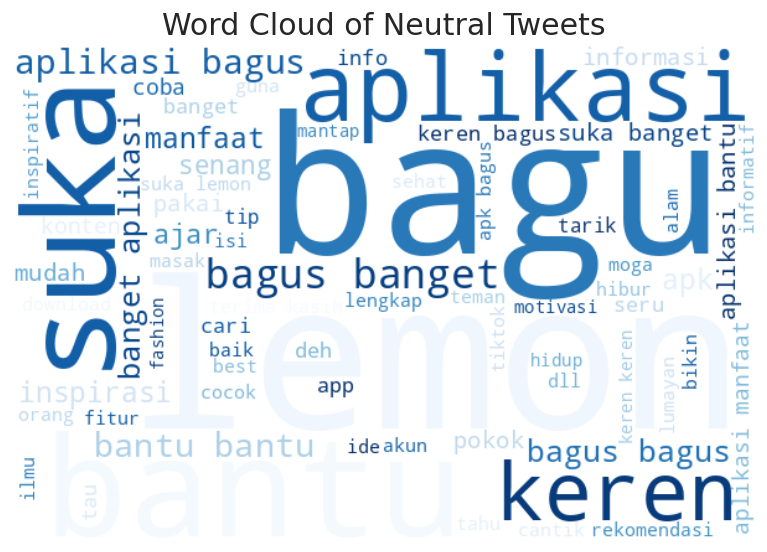

In [133]:
neutral_tweets = df[df['Sentiment'] == 'Netral']['text_final']
list_words_neu = ' '.join([word for tweet in neutral_tweets for word in tweet.split()])

wordcloud_neu = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='Blues',
    min_font_size=10
).generate(list_words_neu)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Word Cloud of Neutral Tweets', fontsize=18)
plt.axis('off')
plt.show()

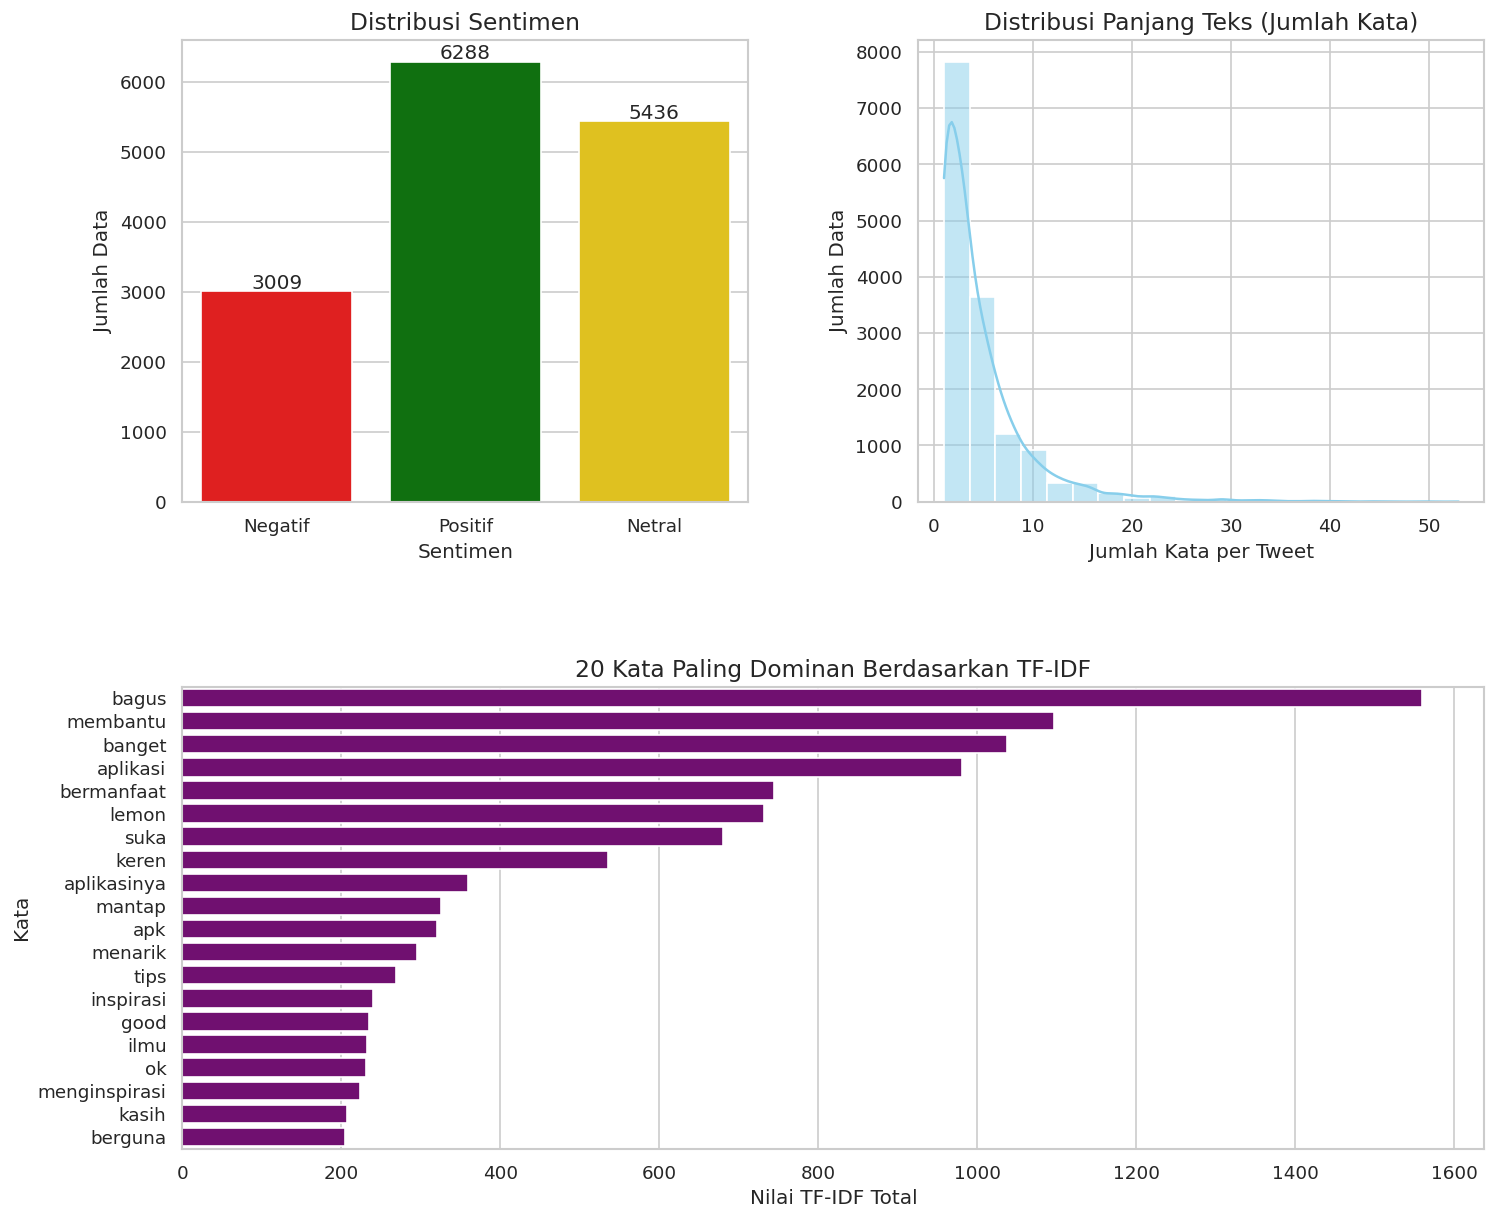

In [134]:
# Pengaturan tampilan visual
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120

# Hitung panjang teks
df['text_length'] = df['text_stopword'].apply(lambda x: len(str(x).split()))

# Membuat figure dan mengatur tata letak subplot
fig = plt.figure(figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# ==============================
# 1. Distribusi Sentimen
# ==============================
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(
    data=df,
    x='Sentiment',  # pastikan sesuai nama kolom di df
    hue='Sentiment',
    palette={'Positif': 'green', 'Netral': 'gold', 'Negatif': 'red'},
    ax=ax1,
    legend=False
)
ax1.set_title('Distribusi Sentimen', fontsize=14)
ax1.set_xlabel('Sentimen')
ax1.set_ylabel('Jumlah Data')

# Menambahkan label angka di atas batang
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

# ==============================
# 2. Distribusi Panjang Teks
# ==============================
ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.histplot(df['text_length'], bins=20, kde=True, color='skyblue', ax=ax2)
ax2.set_title('Distribusi Panjang Teks (Jumlah Kata)', fontsize=14)
ax2.set_xlabel('Jumlah Kata per Tweet')
ax2.set_ylabel('Jumlah Data')

# ==============================
# 3. 20 Kata Paling Dominan (TF-IDF)
# ==============================
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
df['text_stopword'] = df['text_stopword'].fillna('').astype(str)

vectorizer = TfidfVectorizer(
    stop_words='english',
    min_df=5,
    max_df=0.8,
    max_features=500
)
X = vectorizer.fit_transform(df['text_stopword'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menjumlahkan nilai TF-IDF untuk tiap kata dan ambil 20 teratas
tfidf_sum = tfidf_df.sum().sort_values(ascending=False).head(20).reset_index()
tfidf_sum.columns = ['Kata', 'Nilai TF-IDF Total']

sns.barplot(x='Nilai TF-IDF Total', y='Kata', data=tfidf_sum, ax=ax3, color='purple')
ax3.set_title('20 Kata Paling Dominan Berdasarkan TF-IDF', fontsize=14)
ax3.set_xlabel('Nilai TF-IDF Total')
ax3.set_ylabel('Kata')

# ==============================
# Menampilkan semua plot
# ==============================
plt.show()


In [135]:
df.shape[0]

14733

In [136]:
# Simpan DataFrame ke CSV
df.to_csv('lemon8_reviews_clean2.csv', index=False)

# **Data Splitting**

In [137]:
df = pd.read_csv('lemon8_reviews_clean2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   at                    14733 non-null  object
 1   userName              14733 non-null  object
 2   score                 14733 non-null  int64 
 3   content               14733 non-null  object
 4   text_clean            14733 non-null  object
 5   text_casefoldingText  14733 non-null  object
 6   text_slangwords       14733 non-null  object
 7   text_tokenizingText   14733 non-null  object
 8   text_stopword         14733 non-null  object
 9   text_sentence         14733 non-null  object
 10  text_final            14733 non-null  object
 11  Score_Sentiment       14733 non-null  int64 
 12  Sentiment             14733 non-null  object
 13  text_length           14733 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.6+ MB


In [138]:
# Extracting relevant columns
texts = df['text_final']
labels = df['Sentiment']

# Encoding lebels into numeric value
le = LabelEncoder()
y_encoded = le.fit_transform(df['Sentiment']) # Fit LabelEncoder on the full Sentiment column

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- SPLIT A: untuk model SVM (80/20) ---
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Encode labels for Split A (SVM) after splitting
le = LabelEncoder() # Re-initialize or ensure le is fitted before this cell
y_train_A_encoded = le.fit_transform(y_train_A)
y_test_A_encoded = le.transform(y_test_A)


# --- SPLIT B: untuk model LSTM (70/30) ---
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels
)
# Encode labels for Split B (LSTM) after splitting
y_train_B_encoded = le.transform(y_train_B)
y_test_B_encoded = le.transform(y_test_B)


# --- SPLIT C: untuk model BERT (70/30 juga, tapi bisa diacak ulang) ---
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(
    texts, labels, test_size=0.3, random_state=123, stratify=labels
)

print("Split A (SVM):", X_train_A.shape, X_test_A.shape)
print("Split B (LSTM):", X_train_B.shape, X_test_B.shape)
print("Split C (BERT):", X_train_C.shape, X_test_C.shape)

Split A (SVM): (11786,) (2947,)
Split B (LSTM): (10313,) (4420,)
Split C (BERT): (10313,) (4420,)


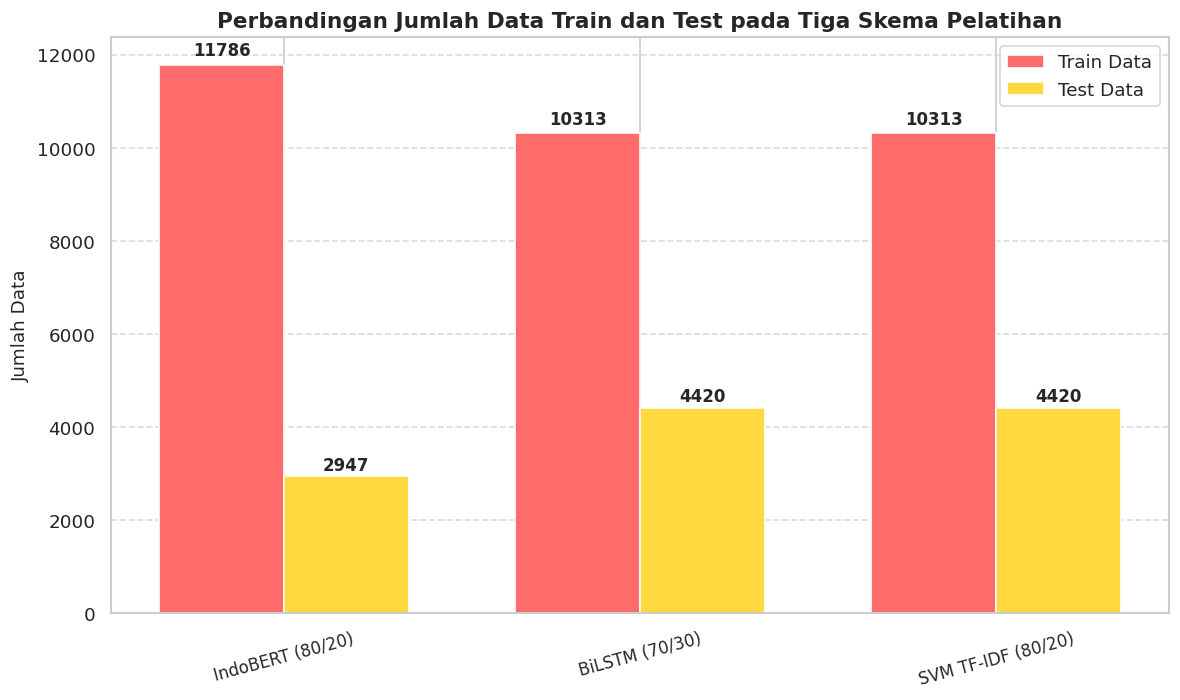

In [140]:
# Data pembagian hasil split dari tiga skema
df_split = pd.DataFrame({
    'Percobaan': ['IndoBERT (80/20)', 'BiLSTM (70/30)', 'SVM TF-IDF (80/20)'],
    'Train Size': [len(X_train_A), len(X_train_B), len(X_train_C)],
    'Test Size': [len(X_test_A), len(X_test_B), len(X_test_C)]
})

# Data untuk diagram batang
labels = df_split['Percobaan']
train_sizes = df_split['Train Size']
test_sizes = df_split['Test Size']

x = np.arange(len(labels))
width = 0.35

# Membuat diagram batang
plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_sizes, width, color='#FF6B6B', label='Train Data')
plt.bar(x + width/2, test_sizes, width, color='#FFD93D', label='Test Data')

# Menambahkan nilai di atas batang
for i in range(len(labels)):
    plt.text(x[i] - width/2, train_sizes[i] + max(train_sizes)*0.01, str(train_sizes[i]),
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(x[i] + width/2, test_sizes[i] + max(test_sizes)*0.01, str(test_sizes[i]),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mengatur tampilan sumbu dan judul
plt.xticks(x, labels, rotation=15, fontsize=10)
plt.ylabel('Jumlah Data', fontsize=11)
plt.title('Perbandingan Jumlah Data Train dan Test pada Tiga Skema Pelatihan', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Pemodelan**

## **Percobaan A SVM TF-IDF**

In [141]:
# Siapkan Data
# Asumsi df sudah ada dan bersih
texts = df['text_final']
labels = df['Sentiment']

#  Encode Label ke Angka
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    texts, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# Buat dan Latih Model SVM
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Prediksi
y_pred = svm_model.predict(X_test_tfidf)

# Evaluasi
train_acc = accuracy_score(y_train, svm_model.predict(X_train_tfidf)) * 100
test_acc  = accuracy_score(y_test, y_pred) * 100

print("Hasil Evaluasi Model SVM (TF-IDF + Split 80/20)")
print(f"Akurasi Training : {train_acc:.2f}%")
print(f"Akurasi Testing  : {test_acc:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Contoh Prediksi Label Asli
y_pred_label = le.inverse_transform(y_pred)
hasil_df = pd.DataFrame({
    'Teks': X_test,
    'Label_Asli': le.inverse_transform(y_test),
    'Prediksi': y_pred_label
})

Hasil Evaluasi Model SVM (TF-IDF + Split 80/20)
Akurasi Training : 97.62%
Akurasi Testing  : 90.80%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.86      0.92      0.89       602
      Netral       0.91      0.84      0.87      1087
     Positif       0.93      0.97      0.95      1258

    accuracy                           0.91      2947
   macro avg       0.90      0.91      0.90      2947
weighted avg       0.91      0.91      0.91      2947



## **Percobaan B LSTM (Bidirectional)**




In [142]:
texts = df['text_final'].astype(str)
labels = df['Sentiment']

# Encode label ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split Data (Percobaan B: 70/30)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    texts, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Tokenisasi dan Padding
max_words = 5000   # jumlah maksimum kata unik
max_len = 100      # panjang maksimal teks

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_B)

X_train_seq = tokenizer.texts_to_sequences(X_train_B)
X_test_seq = tokenizer.texts_to_sequences(X_test_B)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Pastikan tipe data numerik
X_train_pad = np.array(X_train_pad, dtype=np.int32)
X_test_pad = np.array(X_test_pad, dtype=np.int32)
y_train_B = np.array(y_train_B, dtype=np.int32)
y_test_B = np.array(y_test_B, dtype=np.int32)

# Bangun Model LSTM
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

# Early Stopping biar training stabil
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Latih Model
history = model_lstm.fit(
    X_train_pad, y_train_B,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_B),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 46s 254ms/step - accuracy: 0.5883 - loss: 0.8455 - val_accuracy: 0.9154 - val_loss: 0.2555
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - accuracy: 0.9421 - loss: 0.1796 - val_accuracy: 0.9410 - val_loss: 0.1675
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9536 - val_loss: 0.1577
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9868 - loss: 0.0399 - val_accuracy: 0.9570 - val_loss: 0.1672
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 42s 257ms/step - accuracy: 0.9929 - loss: 0.0237 - val_accuracy: 0.9595 - val_loss: 0.1797


In [143]:
#  Evaluasi
train_loss_B, train_acc_B = model_lstm.evaluate(X_train_pad, y_train_B, verbose=0)
test_loss_B, test_acc_B = model_lstm.evaluate(X_test_pad, y_test_B, verbose=0)

print("\nHasil Evaluasi Model LSTM (Split 70/30)")
print(f"Akurasi Training : {train_acc_B*100:.2f}%")
print(f"Akurasi Testing  : {test_acc_B*100:.2f}%")

#  Prediksi dan Laporan
y_pred_prob_B = model_lstm.predict(X_test_pad)
y_pred_B = np.argmax(y_pred_prob_B, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_B, y_pred_B, target_names=le.classes_))

#  Contoh Hasil Prediksi
hasil_pred_B = pd.DataFrame({
    'Teks': X_test_B.iloc[:10],
    'Label_Asli': le.inverse_transform(y_test_B[:10]),
    'Prediksi': le.inverse_transform(y_pred_B[:10])
})


Hasil Evaluasi Model LSTM (Split 70/30)
Akurasi Training : 99.04%
Akurasi Testing  : 95.36%
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.96      0.92      0.94       903
      Netral       0.93      0.95      0.94      1631
     Positif       0.97      0.97      0.97      1886

    accuracy                           0.95      4420
   macro avg       0.95      0.95      0.95      4420
weighted avg       0.95      0.95      0.95      4420



## **Percobaan C (Fix Embedding + Double-layer LSTM)**




In [144]:
# Siapkan data
texts = df['text_final'].astype(str)
labels = df['Sentiment']

# Encode label ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split data 80/20
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(
    texts, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Tokenisasi dan Padding
max_words = 5000
max_len = 100

tokenizer_c = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer_c.fit_on_texts(X_train_C)

X_train_seq_C = tokenizer_c.texts_to_sequences(X_train_C)
X_test_seq_C = tokenizer_c.texts_to_sequences(X_test_C)

X_train_pad_C = pad_sequences(X_train_seq_C, maxlen=max_len, padding='post')
X_test_pad_C = pad_sequences(X_test_seq_C, maxlen=max_len, padding='post')

# Pastikan tipe data numerik
X_train_pad_C = np.array(X_train_pad_C, dtype=np.int32)
X_test_pad_C = np.array(X_test_pad_C, dtype=np.int32)
y_train_C = np.array(y_train_C, dtype=np.int32)
y_test_C = np.array(y_test_C, dtype=np.int32)

# Bangun Model LSTM
model_lstm_C = Sequential([
    Embedding(input_dim=max_words+1, output_dim=128),  # FIX: +1 supaya indeks OOV valid
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model_lstm_C.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# EarlyStopping
early_stop_c = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Latih Model
history_c = model_lstm_C.fit(
    X_train_pad_C, y_train_C,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad_C, y_test_C),
    callbacks=[early_stop_c],
    verbose=1
)


Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 77s 373ms/step - accuracy: 0.5892 - loss: 0.8368 - val_accuracy: 0.9301 - val_loss: 0.2124
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 80s 361ms/step - accuracy: 0.9478 - loss: 0.1633 - val_accuracy: 0.9437 - val_loss: 0.1739
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 68s 367ms/step - accuracy: 0.9755 - loss: 0.0794 - val_accuracy: 0.9430 - val_loss: 0.2061
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 72s 388ms/step - accuracy: 0.9861 - loss: 0.0473 - val_accuracy: 0.9549 - val_loss: 0.1847


In [145]:
# Evaluasi
train_loss_c, train_acc_c = model_lstm_C.evaluate(X_train_pad_C, y_train_C, verbose=0)
test_loss_c, test_acc_c = model_lstm_C.evaluate(X_test_pad_C, y_test_C, verbose=0)

print("\nHasil Evaluasi Model LSTM (Double Layer + Split 80/20)")
print(f"Akurasi Training : {train_acc_c*100:.2f}%")
print(f"Akurasi Testing  : {test_acc_c*100:.2f}%")

# Prediksi dan Laporan
y_pred_prob_C = model_lstm_C.predict(X_test_pad_C)
y_pred_C = np.argmax(y_pred_prob_C, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_C, y_pred_C, target_names=le.classes_))

# Contoh hasil prediksi
hasil_pred_C = pd.DataFrame({
    'Teks': X_test_C.iloc[:10],
    'Label_Asli': le.inverse_transform(y_test_C[:10]),
    'Prediksi': le.inverse_transform(y_pred_C[:10])
})


Hasil Evaluasi Model LSTM (Double Layer + Split 80/20)
Akurasi Training : 97.79%
Akurasi Testing  : 94.37%
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.95      0.93       602
      Netral       0.93      0.93      0.93      1087
     Positif       0.98      0.95      0.96      1258

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



## Perbandingan Data Akurasi

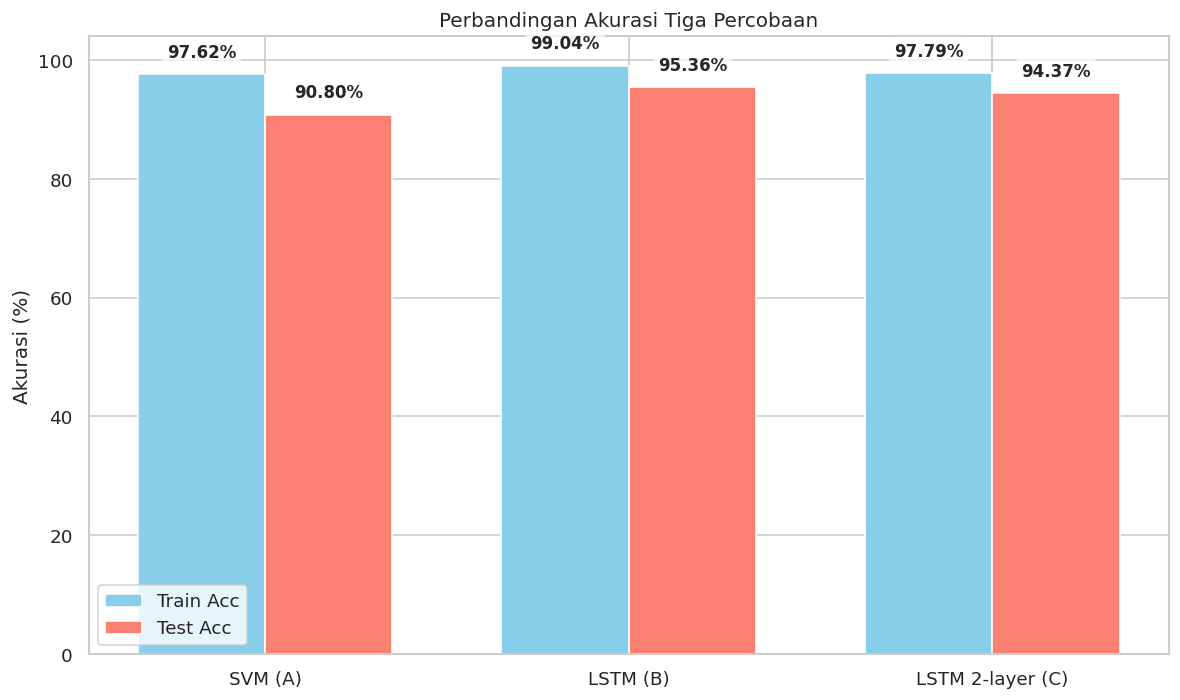

In [146]:
# --- Data Akurasi (isi dengan hasil evaluasi masing-masing model) ---
models = ['SVM (A)', 'LSTM (B)', 'LSTM 2-layer (C)']
train_accs = [train_acc, train_acc_B*100, train_acc_c*100]
test_accs = [test_acc, test_acc_B*100, test_acc_c*100]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

# Batang Training
rects1 = ax.bar(x - width/2, train_accs, width, label='Train Acc', color='skyblue')
# Batang Testing
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Acc', color='salmon')

# Tambahkan label, judul, dan legend
ax.set_ylabel('Akurasi (%)')
ax.set_title('Perbandingan Akurasi Tiga Percobaan')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,8),  # offset vertikal lebih besar
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))


autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


## Inference untuk Model SVM dan LSTM

Interface aplikasi menggunakan dua model sekaligus, SVM dan LSTM, agar analisis sentimen lebih fleksibel dan akurat. SVM bekerja cepat dan cocok untuk ulasan yang pendek atau sederhana, sementara LSTM mampu menangkap konteks kata dalam kalimat yang lebih panjang atau kompleks. Dengan menggunakan kedua model, kita bisa membandingkan hasil prediksi, meningkatkan keandalan analisis, dan memberi pengguna pilihan model yang sesuai dengan kebutuhan. Selain itu, kombinasi ini juga membantu dalam validasi hasil dan pembelajaran, sehingga kita dapat memahami kelebihan dan kelemahan masing-masing model dengan lebih jelas.

In [147]:
# === Inference untuk Model SVM dan LSTM Sekaligus ===
kalimat_baru = input("Masukkan kalimat baru: ")

# Preprocessing pakai pipeline kamu sendiri
kalimat_baru_clean = toSentence(filteringText(tokenizingText(
    fix_slangwords(casefoldingText(cleaningText(kalimat_baru)))
)))

# ===== Model SVM =====
X_baru_tfidf = vectorizer.transform([kalimat_baru_clean])
pred_svm = svm_model.predict(X_baru_tfidf)
hasil_svm = le.inverse_transform(pred_svm)[0]

# ===== Model LSTM =====
seq = tokenizer.texts_to_sequences([kalimat_baru_clean])
pad = pad_sequences(seq, maxlen=100, padding='post')
pred_lstm = np.argmax(model_lstm.predict(pad), axis=1)
hasil_lstm = le.inverse_transform(pred_lstm)[0]

print("\n=== HASIL PREDIKSI ===")
print(f"Teks: {kalimat_baru}")
print(f"Prediksi Model SVM  : {hasil_svm}")
print(f"Prediksi Model LSTM : {hasil_lstm}")


Masukkan kalimat baru: jelek sekali
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

=== HASIL PREDIKSI ===
Teks: jelek sekali
Prediksi Model SVM  : Negatif
Prediksi Model LSTM : Negatif


## Dokumentasi Interface

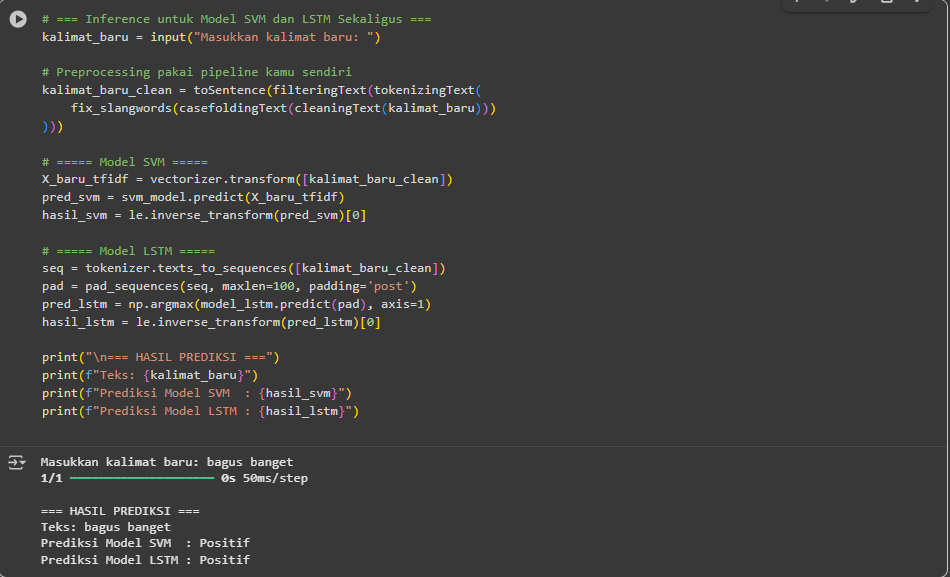


  
)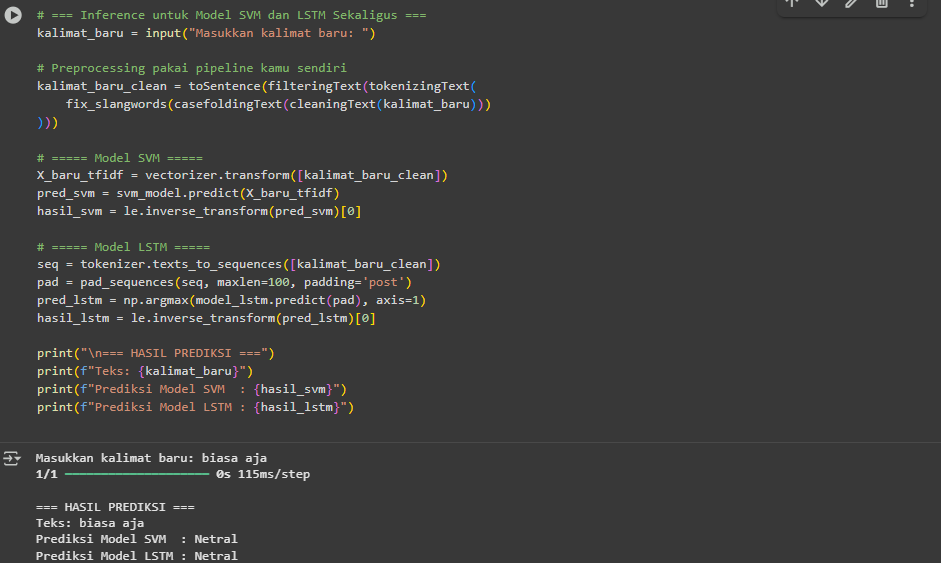

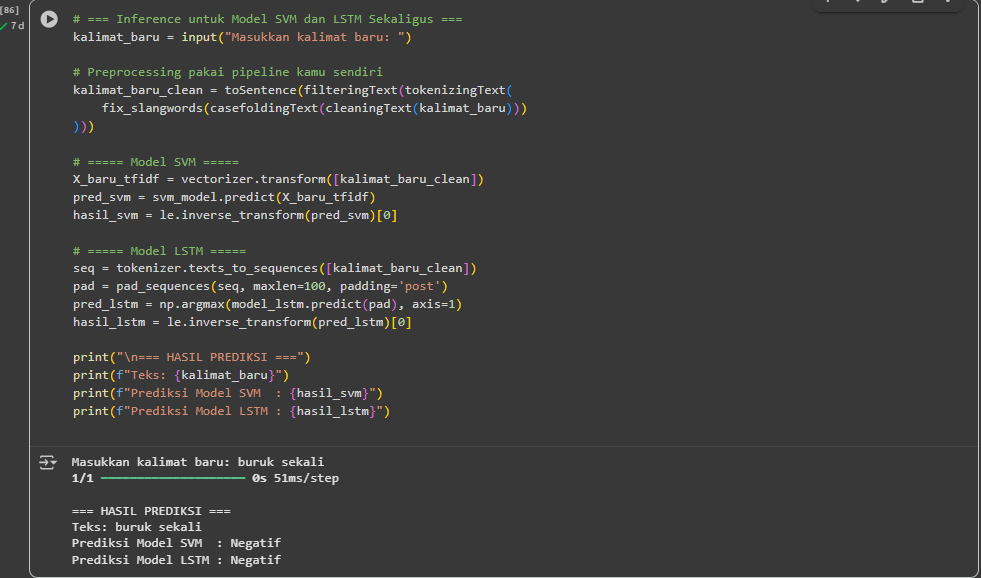

In [148]:
!pip freeze > requirements.txt
!cat requirements.txt

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.13.0.37.17
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.24.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex==0.1.90
cl